## Цель работы

Изучение алгоритмов и методов классификации на практике.

## Задание

Порядок выполнения:
1.	Загрузить набор данных.
2.	Провести предварительную обработку данных.
3.	Выделить целевую переменную, которую необходимо предсказать. Не включать эту целевую переменную в модель. Построить матрицу диаграмм рассеяния, выделив значения целевой переменной разными цветами.
4.	Разбить набор данных на тренировочной и тестовый датасеты с помощью train_test_split и выполнить стандартизацию числовых данных с помощью StandardScaler .
Для получения оценки 5 разработать предсказательную модель качественного отклика методами:
  *	метод k- ближайших соседей
  *	дерево решений
  *	логистическая регрессия
  *	случайный лес.  

5. Для получения оценки 4 разработать предсказательную модель качественного отклика любыми двумя методами.
5.	Оценить ошибку классификации для каждого метода. Подсчитать метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'.
6.	Построить матрицу неточностей с помощью confusion_matrix для каждого метода.
7.	Построить графики ROC-кривой для каждого метода на одном графике 4 линии на одном графике для сравнения.
8.	Сделать вывод о качестве построенного классификатора по подсчитанным выше метрикам.


## Ход выполнения работы

Перед началом работы импортируются библиотеки, необходимые для выполнения задания.

In [25]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

Импортируется набор данных, который будет использоваться в работе.

In [26]:
df = pd.read_csv('2liver.csv', sep=',')
pd.set_option('display.width', 10000)

Из данных удаляются дубликаты, некорректные данные, а так же проверяются названия столбцов и их типы.

In [27]:
print(df.columns.tolist())
df = df.rename(columns={'TotalBilirubin': 'Total_Bilirubin', 'Dataset123': 'Target'})
print('\n\n\n')
for column in df.columns:
	if df[column].dtype == 'object':
		print(df[column].value_counts())
		print('\n\n\n')
df['Gender'] = df['Gender'].replace('Mal', 'Male')
df['Target'] = df['Target'].replace({'1': 'yes', '2': 'no'})
print(df.describe())
df = df.dropna()
df = df.drop_duplicates()
print('\n\n\n')
print(df.describe())

['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset123']




Gender
Male      443
Female    142
Mal         2
Name: count, dtype: int64




Aspartate_Aminotransferase
23     16
20     14
30     14
21     14
24     14
       ..
367     1
101     1
168     1
134     1
49      1
Name: count, Length: 178, dtype: int64




Target
1      417
2      169
yes      1
Name: count, dtype: int64




              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  Total_Protiens     Albumin  Albumin_and_Globulin_Ratio
count  587.000000       585.000000        587.000000            586.000000                587.000000      587.000000  587.000000                  583.000000
mean    44.706985         3.284957          1.477342            289.965870                 80.354344        6.484327    3.146337              

Строится матрица диаграмм рассеяния. 

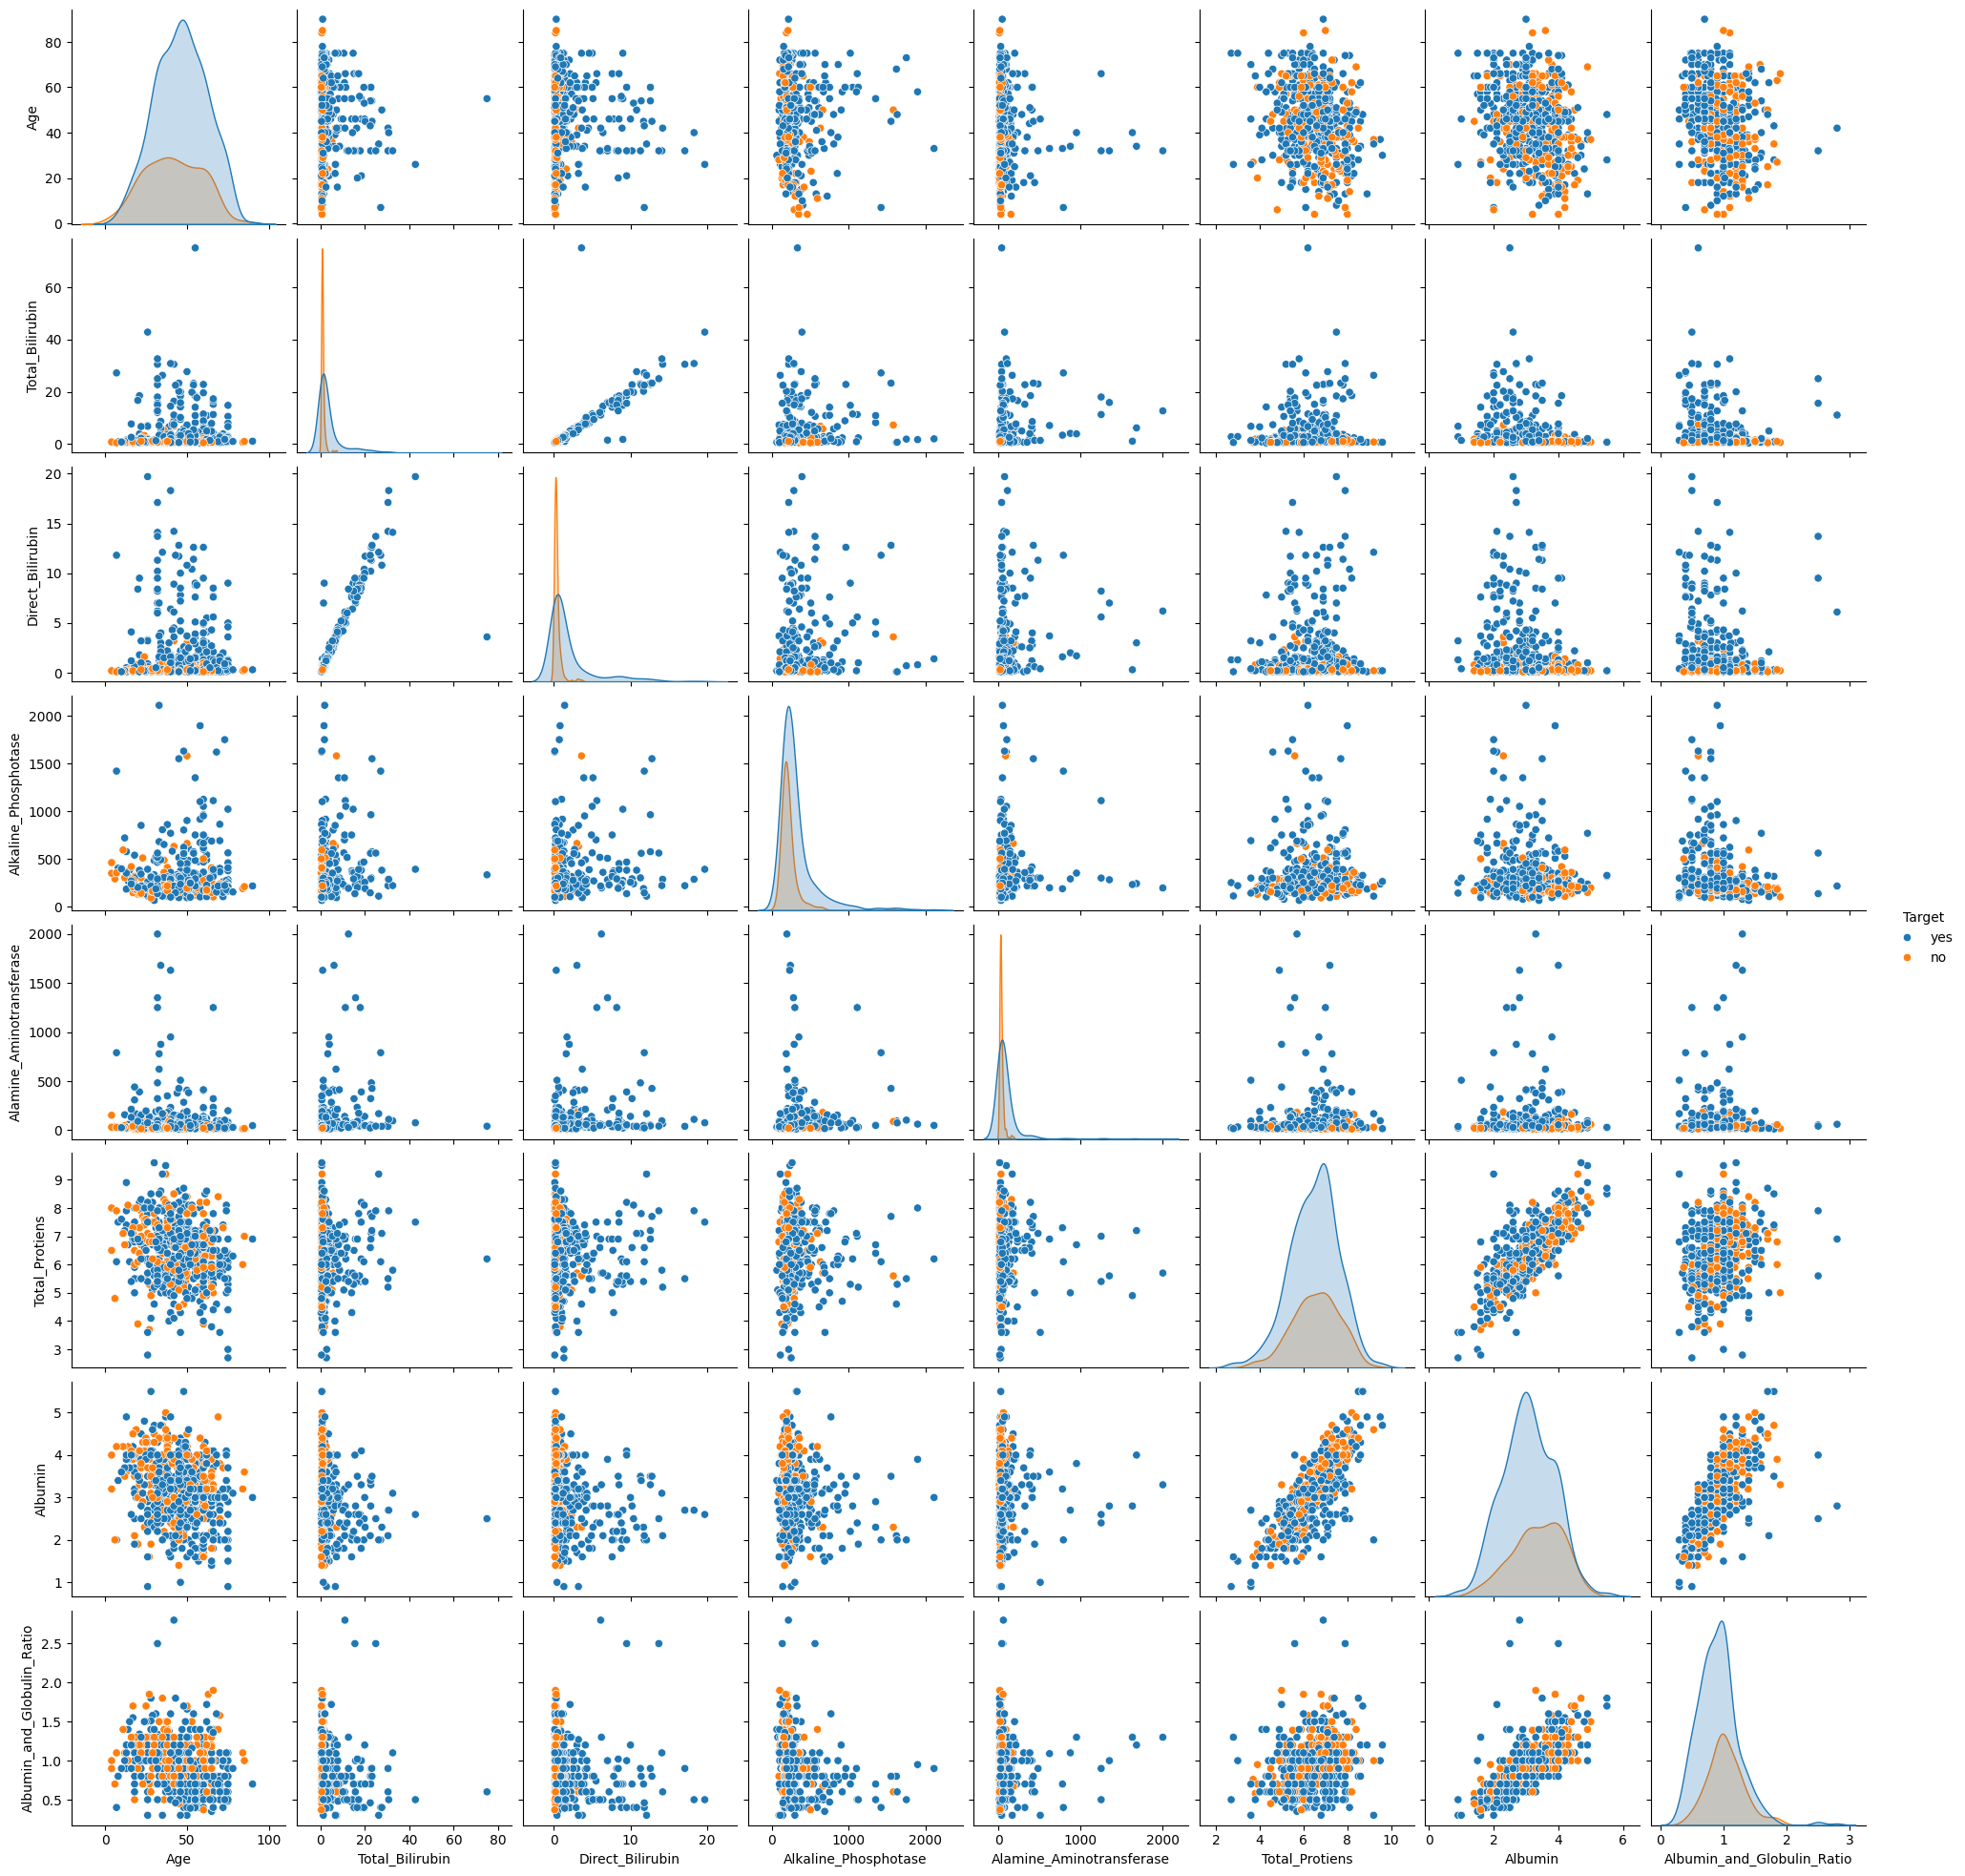

In [28]:
sns.pairplot(df, hue='Target')

plt.show()

Можно сделать вывод, что все анализы людей, у которых имеются заболевания, ниже, чем у людей без заболеваний. Однако исключениями являются билирубин и аминоаминотрансфераза, они наоборот выше у людей с заболеваниями.

Данные сначала нормируются c использованием StandardScaler и label encoder, а затем разделяются на обучающую и тестовую выборки.

In [29]:
label_encoder = LabelEncoder()
text_columns = df.select_dtypes(include=['object']).columns
for column in text_columns:
  df[column] = label_encoder.fit_transform(df[column])

x = df.drop("Target", axis=1)
y = df["Target"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.25, random_state=0
)

Строится модель для KNN, вычисляются метрики.

Accuracy: 0.6950354609929078
Precision: 0.7368421052631579
Recall: 0.865979381443299
Balanced accuracy: 0.5920805998125586
F1: 0.7962085308056872


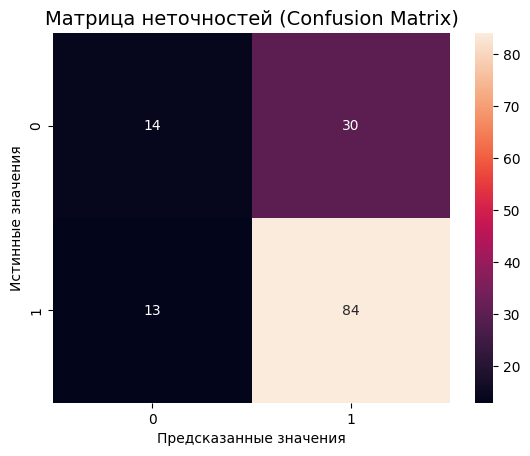

In [30]:

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
knn_probs = model.predict_proba(x_test)[:, 1]
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)
plt.title("Матрица неточностей (Confusion Matrix)", fontsize=14);
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')


print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Balanced accuracy:', balanced_accuracy_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
